# Implementação do Algoritmo KNN

In [10]:
import torch
import matplotlib.pyplot as plt
from torch.nn.functional import normalize
from sklearn import datasets
from sklearn.utils import shuffle

In [11]:
from supervisioned.knn.KNN import KNN
from util.TrainTestSplitter import TTSplitter
from util.Statistics import Statistics

## Carregando base de dados: Iris

In [12]:
iris = datasets.load_iris()

## Separando a base de dados em treino e teste

Para realização da prática, a quantidade de amostras utilizadas para realização do treinamento, armazenamento dos dados em memória, foi equivalente ao valor de 80% do total. Restando, portanto, 20% para realização dos testes. Ademais, as entradas foram normalizadas para um melhor desempenho do algoritmo KNN. Por fim, as respectivas entradas e saídas são divididas.

In [13]:
# Embaralhando a base de dados
samples, targets = shuffle(iris.data, iris.target)
samples, targets = normalize(torch.tensor(samples), 1, 1), torch.tensor(targets)
x_train, x_test, y_train, y_test = TTSplitter(samples, targets, 0.80).split()

# Samples has 4 attributes, you have to choose two of them.

Para que os dados pudessem ser visualizados, foi preciso realizar o processo com 2 atributos, altura da sépala e largura da sépala.

In [14]:
attr = [0, 1]

## Visualizando as amostras no plano cartesiano

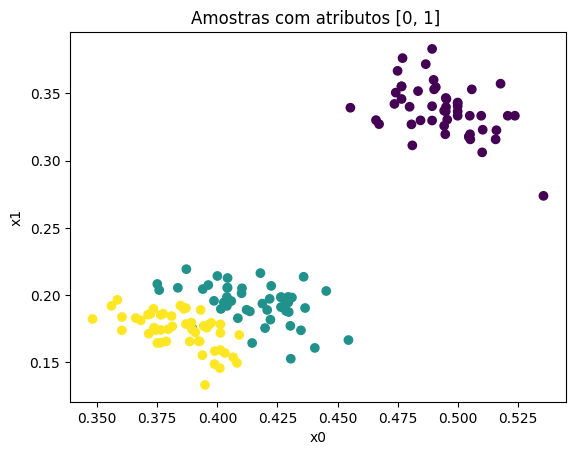

In [15]:
plt.scatter(samples[:, attr[0]], samples[:, attr[1]], c=targets)
plt.title("Amostras com atributos %s " % attr)
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

## Criação dos pontos do plano de decisão do algoritmo

In [16]:
# Creating a square with some points to plot the decision boundary
Zx, Zy = torch.meshgrid([torch.arange(torch.min(samples[:, attr[0]]), torch.max(samples[:, attr[0]]), 0.0025),
                         torch.arange(torch.min(samples[:, attr[1]]), torch.max(samples[:, attr[1]]), 0.0025)], indexing='xy')

Zx = Zx.reshape(Zx.shape[0] * Zx.shape[1])
Zy = Zy.reshape(Zy.shape[0] * Zy.shape[1])

Zz = []
for e in zip(Zx, Zy):
    Zz.append(torch.tensor([e[0], e[1]]).tolist())
Zz = torch.tensor(Zz, dtype=float)

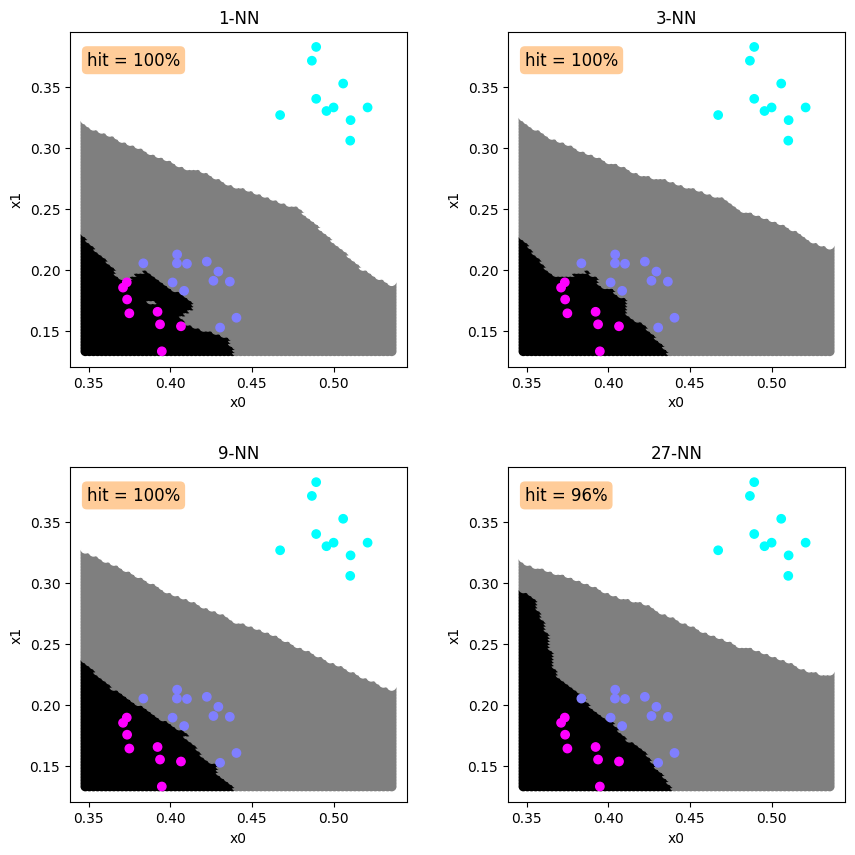

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.subplots_adjust(hspace=0.30, wspace=0.30)

for k, v in zip([1, 3, 9, 27], [[0, 0], [0, 1], [1, 0], [1, 1]]) :
        clf = KNN(k, x_train[:, attr], y_train)

        Z_targets = clf.predict(Zz)

        ssLabel = "hit = %d%%" % (Statistics().hit_rate(clf.predict(x_test[:, attr]), y_test) * 100)

        axs[v[0], v[1]].set_title('%s-NN' % k)
        axs[v[0], v[1]].set_xlabel('x0')
        axs[v[0], v[1]].set_ylabel('x1')
        axs[v[0], v[1]].scatter(Zx, Zy, c=Z_targets, cmap='binary')
        axs[v[0], v[1]].scatter(x_test[:, attr[0]], x_test[:, attr[1]], c=y_test, cmap='cool')
        axs[v[0], v[1]].annotate(ssLabel, fontsize=12, xy=(0.05, 0.9), xycoords='axes fraction',
            bbox=dict(boxstyle="round", fc=(1, .8, 0.6), ec="none"))
plt.show()

# Conclusão

É possível perceber pelos gráficos que quando menor o K, limitado ao mínimo de 1, maior será o _overfitting_ e, portanto, mais distante da função que gera o plano de decisão. Isto pode causar imprecisões a novas amostras que o algoritmo precise classificar.